In [14]:
import sys
sys.path.append('src/')
import numpy as np
import matplotlib.pyplot as plt

from models.markov_chain import MarkovChain
from preprocess import parse_files_to_sequences, limit_uniq_notes, get_dictionaries
from save_midi import save_notes_and_durations

In [15]:
folderpath = "tabs/"
track_name = 'guitar'

In [16]:
notes, durations = parse_files_to_sequences(folderpath, track_name)

In [17]:
notes, durations = limit_uniq_notes(notes, durations, 150)

In [18]:
note_dictionary, inv_note_dictionary, notes_to_int, \
duration_dictionary, inv_dur_dictionary, durations_to_int = get_dictionaries(notes, durations)

In [19]:
notes[:10]

['D3.A2.D2.', '', '', '', '', '', '', '', 'D3.', 'D#3.']

In [20]:
durations[:10]

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.0625]

In [21]:
markov_notes = MarkovChain()
markov_notes.fit_partial(notes_to_int)

In [22]:
markov_durations = MarkovChain()
markov_durations.fit_partial(durations_to_int)

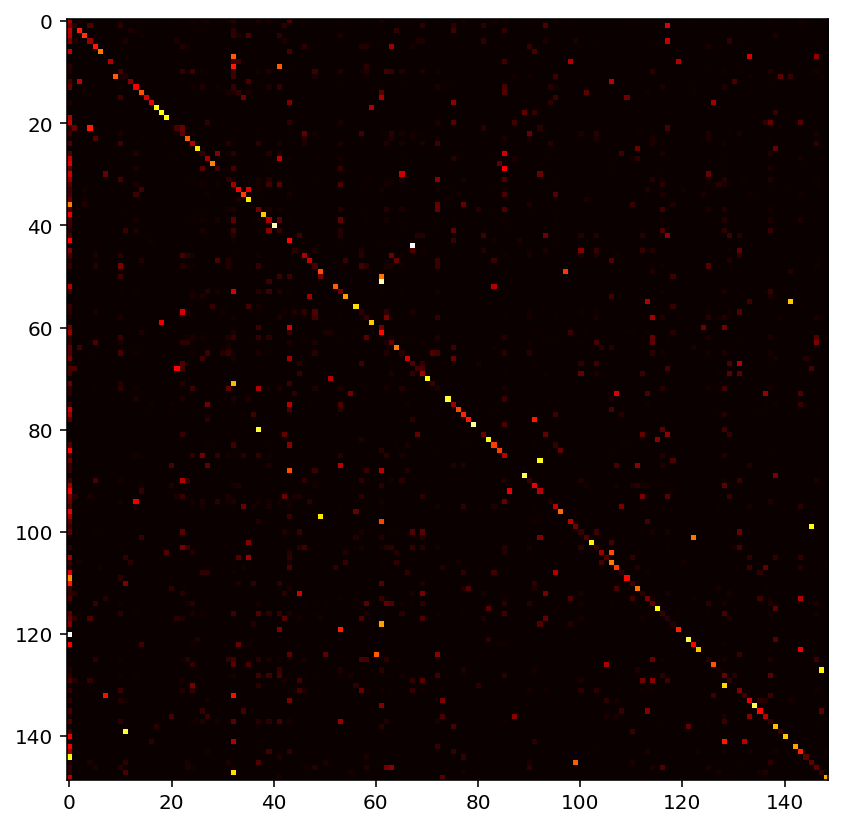

In [23]:
note_matrix = markov_notes.heatmap_of_transitions()

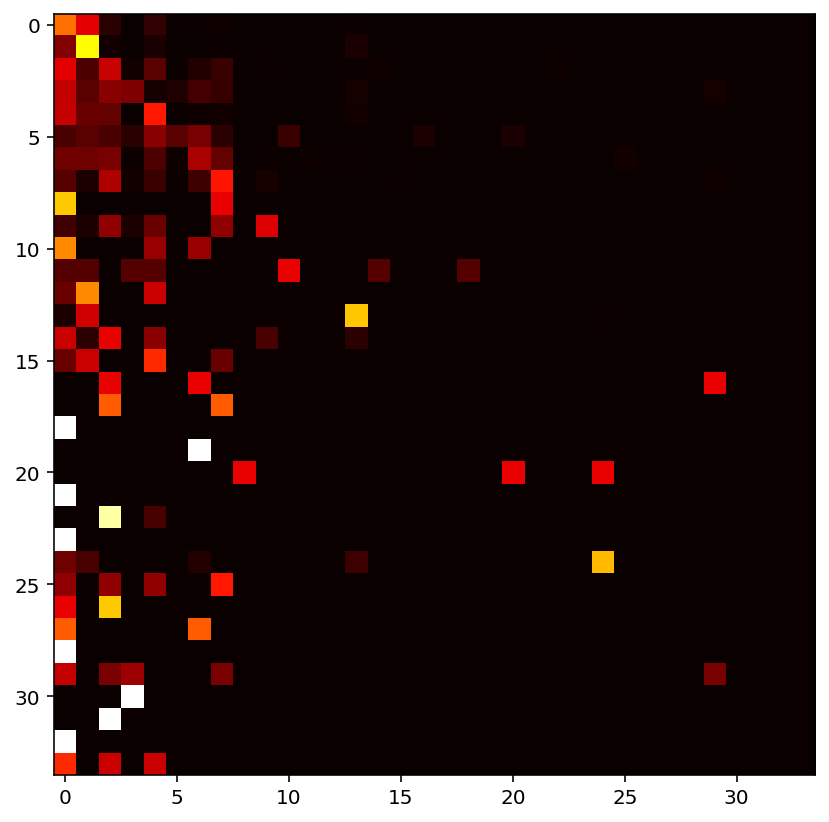

In [24]:
duration_matrix = markov_durations.heatmap_of_transitions()

In [25]:
def sample(preds, temperature):
    if temperature == 0:
        return np.argmax(preds)
    else:
        preds = np.log(preds) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        return np.random.choice(len(preds), p=preds)

In [26]:
temperatures = [0.0, 0.5, 0.9]

for temperature in temperatures:
    generated_notes = [note_dictionary['B2.']]
#     generated_notes = [note_dictionary['46.36.']]
    generated_durations = [duration_dictionary[1/16]]
    for i in range(100):
        probas = [markov_notes.predict_proba_state_transition(generated_notes[i], note_dictionary[x]) + 1e-6 for x in note_dictionary]
        generated_notes.append(sample(probas, temperature))

        probas = [markov_durations.predict_proba_state_transition(generated_durations[i], duration_dictionary[x]) + 1e-6 for x in duration_dictionary]
        generated_durations.append(sample(probas, temperature))
    
    generated = [[inv_note_dictionary[x] for x in generated_notes], [inv_dur_dictionary[x] for x in generated_durations]]
    save_notes_and_durations(generated, f'output/markov/markov_output_{temperature}')